![image](https://s3.amazonaws.com/production-wordpress-assets/blog/wp-content/uploads/2016/12/21113328/python-logo.png)

## RANDOM FOREST CLASSIFICATION USING PYSPARK AND HDFS

The core of Apache Hadoop consists of a storage part, known as Hadoop Distributed File System (HDFS), and a processing part which is a MapReduce programming model. Hadoop splits files into large blocks and distributes them across nodes in a cluster. It then transfers packaged code into nodes to process the data in parallel. This approach takes advantage of data locality,where nodes manipulate the data they have access to. This allows the dataset to be processed faster and more efficiently than it would be in a more conventional supercomputer architecture that relies on a parallel file system where computation and data are distributed via high-speed networking.

Apache Spark is an open-source cluster-computing framework. Originally developed at the University of California, Berkeley's AMPLab, the Spark codebase was later donated to the Apache Software Foundation, which has maintained it since. Spark provides an interface for programming entire clusters with implicit data parallelism and fault tolerance.

The Spark Python API (PySpark) exposes the Spark programming model to Python.



## DATA USED

We have used the famous problem dataset 'Bank Marketing DataSet' from UCI Machine Learning Repository. You can see the data [here](https://archive.ics.uci.edu/ml/datasets/bank+marketing).

In [3]:
import pandas as pd

## IMPORTING DATA

Let's import the data and see the frequency of our target variable

In [5]:
df=pd.read_csv('Bank-full.csv', sep=';')
df
df["y"].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

'Yes' values are quite low as compared to 'No', so in the raw data baseline accuracy is 13.2%

## DATA VISUALIZATION and ANALYSIS

Let's visualize our data and try to find some data insights out of it

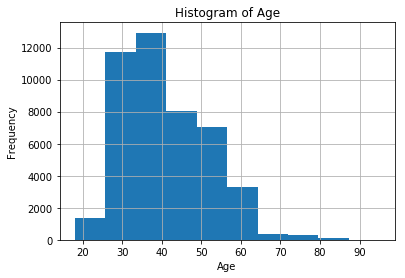

In [6]:
import matplotlib.pyplot as plt
### Age variable relation with outcome
%matplotlib inline
df.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

From the figure above we can see that age 30-40 has maximum number of customers.

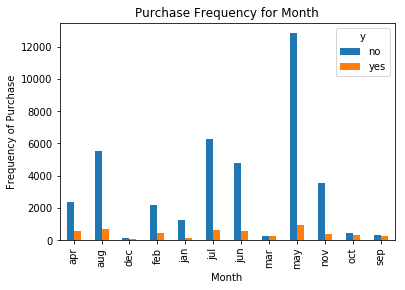

In [7]:
###Frequency for month
pd.crosstab(df.month,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

We can see from the above plot that month of may has maximum number of people saying no and yes as well. It seems like this is the best month to target customers and convert them into taking a term deposit.

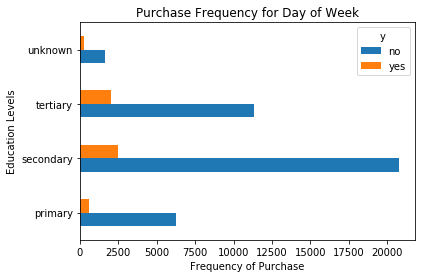

In [8]:
### Day of week with outcome
pd.crosstab(df.education,df.y).plot(kind='barh')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Frequency of Purchase')
plt.ylabel('Education Levels')
plt.savefig('Education_Purchase_By')

Education levels above primary are much likely to take the bank's term deposit plan

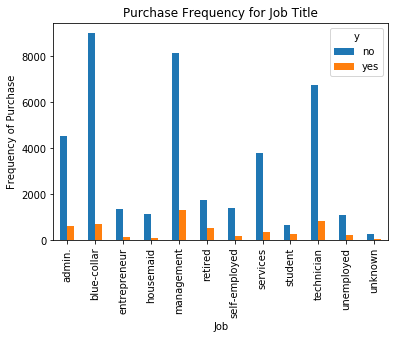

In [9]:
### job type
%matplotlib inline
pd.crosstab(df.job,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

People with management, blue-collar and technician jobs are more likely to purchase the term deposit plans.

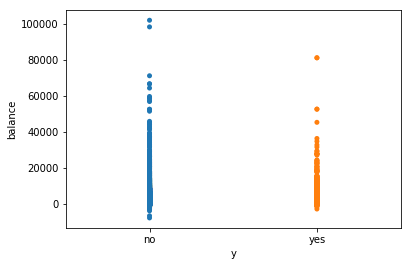

In [10]:
import seaborn as sns
sns.stripplot(x="y", y="balance", data=df);

People with balance below 40000 dollars are getting term deposit.

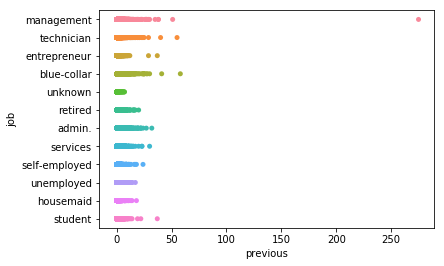

In [12]:
import seaborn as sns
sns.stripplot(x="previous", y="job", data=df);

From the plot above we can see that there is an outlier in management

## DATA CLEANING

Data cleaning is required at this stage to reduce skewness, fill values and converting categorical values to numerical values

In [13]:
cleanup_nums = {
                "poutcome":    {"failure":1,"success":2,"unknown":3,"other":4},
                "housing":      {"yes": 1, "no": 0, "unknown": 2},
                "loan":         {"yes": 1, "no":0, "unknown": 2},
                "default":      {"yes": 1, "no":0, "unknown": 2},
                "contact":      {"cellular": 1, "telephone": 2, "unknown": 3},
                "job":      {"admin.": 1, "blue-collar": 2, "entrepreneur": 3,"housemaid": 4, "management": 5, 
                             "retired": 6,"self-employed": 7,"services": 8,"student": 9,"technician": 10,"unemployed": 
                             11,"unknown": 12},
                "marital":  {"divorced": 1, "married": 2, "single": 3, "unknown": 4},
                "education": {"primary": 1, "secondary":2, "tertiary":3,"unknown": 4},
                "month":  {"jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6, "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec":12},
                "y"         : {"no": 0, "yes": 1}
                }
df.replace(cleanup_nums, inplace= True)

Let's see the converted data now

In [14]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,5,2,3,0,2143,1,0,3,5,5,261,1,-1,0,3,0
1,44,10,3,2,0,29,1,0,3,5,5,151,1,-1,0,3,0
2,33,3,2,2,0,2,1,1,3,5,5,76,1,-1,0,3,0
3,47,2,2,4,0,1506,1,0,3,5,5,92,1,-1,0,3,0
4,33,12,3,4,0,1,0,0,3,5,5,198,1,-1,0,3,0
5,35,5,2,3,0,231,1,0,3,5,5,139,1,-1,0,3,0
6,28,5,3,3,0,447,1,1,3,5,5,217,1,-1,0,3,0
7,42,3,1,3,1,2,1,0,3,5,5,380,1,-1,0,3,0
8,58,6,2,1,0,121,1,0,3,5,5,50,1,-1,0,3,0
9,43,10,3,2,0,593,1,0,3,5,5,55,1,-1,0,3,0


Skewness affects the model directly. Let's check it to find any patterns

In [15]:
### Checking skewness
from scipy.stats import skew
skew(df, axis=0, bias=True)

array([  0.6847952 ,   0.26174663,  -0.10282302,   0.1972687 ,
         7.24513472,   8.36003095,  -0.22475867,   1.85255563,
         0.76935569,   0.09307593,   0.24283389,   3.14421378,
         4.89848764,   2.61562869,  41.84506609,  -1.77020862,   2.38340137])

Previous column has skewness value of more than 40. This is significantly higher than the expected range. Let's try to reduce this:

In [16]:
import math
df.loc[df["previous"]==275, "previous"]= math.log10(275)
skew(df, axis=0, bias=True)

array([ 0.6847952 ,  0.26174663, -0.10282302,  0.1972687 ,  7.24513472,
        8.36003095, -0.22475867,  1.85255563,  0.76935569,  0.09307593,
        0.24283389,  3.14421378,  4.89848764,  2.61562869,  7.82963095,
       -1.77020862,  2.38340137])

We can see the high skewness of 'previous' column has significantly reduced. We can similarly check and reduce skewness for other columns as well. 

Now lets look at the density of each variable after cleaning.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0F32CFB0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0954B6B0>]], dtype=object)

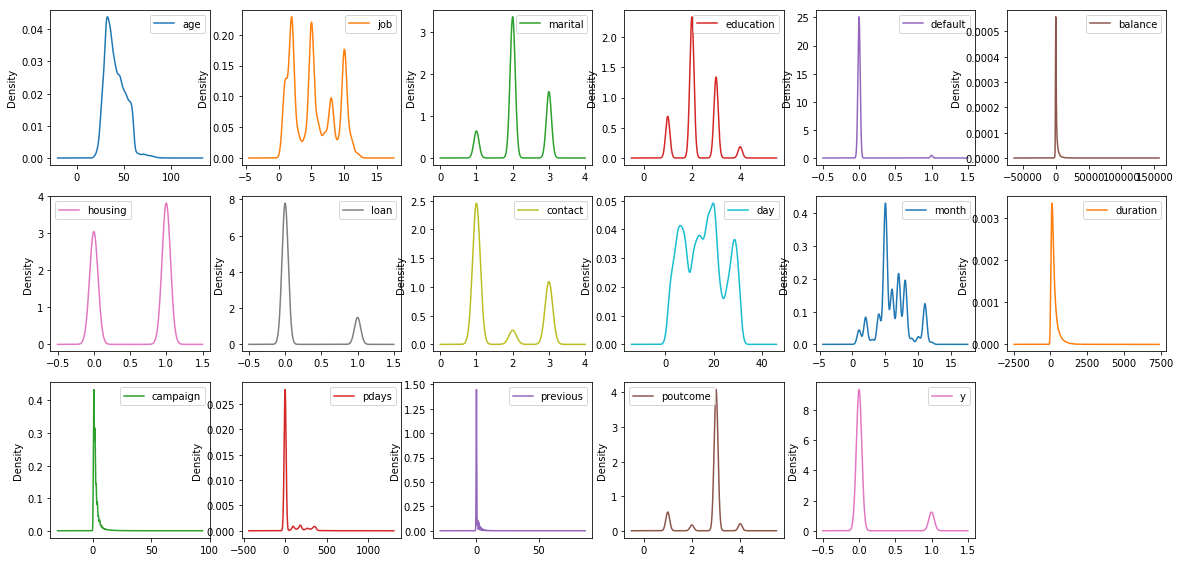

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
df.plot(kind='density', subplots=True, layout=(6,6), sharex=False, figsize=(20,20))

Lets save this data in a file and upload it to HDFS

In [87]:
df.to_csv("file.csv")

### Our purpose is to use Hadoop and PySpark Machine Learning Libraries to apply model to the data.

### Hadoop and PySpark for IPython Notebook was set up in Windows 10.
!['Image'](https://preview.ibb.co/gh4NfR/Apache_Spark.jpg)

### Hadoop datanode, namenode, yarn and resource manager running on Windows 10

![Image](https://preview.ibb.co/cVLg76/HDFS_cluster_nodes.jpg)

### Data to HDFS was loaded in the following way:
!['Image'](https://preview.ibb.co/kv11Pm/HDFS_Input.jpg)

### Hadoop Cluster Running Locally
!['Image'](https://preview.ibb.co/jxBnVR/Hadoop_Cluster.jpg)

### SPARK Shell running locally
!['Image'](https://preview.ibb.co/ewMFH6/Spark_Shell.jpg)

### Import the PySpark Machine Learning Libraries

In [18]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.classification import RandomForestClassifier as RF
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import StringIndexer, VectorIndexer, VectorAssembler, SQLTransformer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
import pandas as pd
import numpy as np
import functools
from pyspark.ml.feature import OneHotEncoder
from pyspark import SQLContext
from pyspark import SparkContext

### Creating SparkContext object sc

In [19]:
sc= SparkContext()

### Loading the PySpark Shell for Python and Spark Integration

In [20]:
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [21]:
from pyspark.sql import SparkSession
sparkSession = SparkSession.builder.appName("TermDeposit").getOrCreate()

### Load the input data from HDFS and analyze it

In [92]:
df_load = sparkSession.read.csv('hdfs://localhost:9000/input/file.csv',header= True, sep= ',')
df_load.show()

+---+---+---+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
|_c0|age|job|marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|  y|
+---+---+---+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
|  0| 58|  5|      2|        3|      0|   2143|      1|   0|      3|  5|    5|     261|       1|   -1|     0.0|       3|  0|
|  1| 44| 10|      3|        2|      0|     29|      1|   0|      3|  5|    5|     151|       1|   -1|     0.0|       3|  0|
|  2| 33|  3|      2|        2|      0|      2|      1|   1|      3|  5|    5|      76|       1|   -1|     0.0|       3|  0|
|  3| 47|  2|      2|        4|      0|   1506|      1|   0|      3|  5|    5|      92|       1|   -1|     0.0|       3|  0|
|  4| 33| 12|      3|        4|      0|      1|      0|   0|      3|  5|    5|     198|       1|   -1|     0.0|       3|  0|


### Dropping the extra column _c0

In [93]:
df_load=df_load.drop('_c0')
df_load.show()

+---+---+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
|age|job|marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|  y|
+---+---+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
| 58|  5|      2|        3|      0|   2143|      1|   0|      3|  5|    5|     261|       1|   -1|     0.0|       3|  0|
| 44| 10|      3|        2|      0|     29|      1|   0|      3|  5|    5|     151|       1|   -1|     0.0|       3|  0|
| 33|  3|      2|        2|      0|      2|      1|   1|      3|  5|    5|      76|       1|   -1|     0.0|       3|  0|
| 47|  2|      2|        4|      0|   1506|      1|   0|      3|  5|    5|      92|       1|   -1|     0.0|       3|  0|
| 33| 12|      3|        4|      0|      1|      0|   0|      3|  5|    5|     198|       1|   -1|     0.0|       3|  0|
| 35|  5|      2|        3|     

### Select columns to drop and duplicate values

In [96]:
cols_select= ['age',
              'job','marital', 'education', 'default', 'balance', 'housing', 'loan',
              'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
              'poutcome', 'y']

df= df_load.select(cols_select).dropDuplicates()

### Let's plot the distribution of Target variable

Histogram below: 


([<matplotlib.axis.XTick at 0x1170f050>,
 <a list of 2 Text xticklabel objects>)

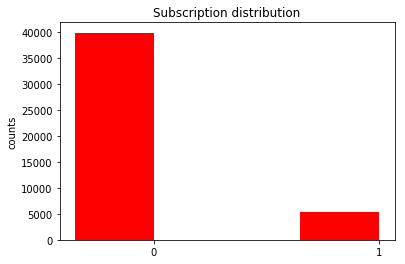

In [97]:
from matplotlib import pyplot as plt
%matplotlib inline
print("Histogram below: ")
responses = df.groupBy('y').count().collect()
categories = [i[0] for i in responses]
counts = [i[1] for i in responses]

ind= np.array(range(len(categories)))
width = 0.35
plt.bar(ind, counts, width= width, color = 'r')

plt.ylabel('counts')
plt.title('Subscription distribution')
plt.xticks(ind + width/2., categories)

In [98]:
cols_select = ['age',
               'balance',
               'day',
               'duration',
               'campaign',
               'pdays',
               'previous',
               'job', 
               'marital',
               'education',
               'default',
               'housing',
               'loan',
               'contact',
               'month', 
               'poutcome',
                'y']
df=df.select(df.age.cast('float'),
            df.balance.cast('float'),
            df.day.cast('float'),
            df.duration.cast('float'),
            df.campaign.cast('float'),
            df.pdays.cast('float'),
            df.previous.cast('float'),
            df.job.cast('float'),
            df.marital.cast('float'),
            df.education.cast('float'),
            df.default.cast('float'),
            df.housing.cast('float'),
            df.loan.cast('float'),
            df.contact.cast('float'),
            df.month.cast('float'),
            df.poutcome.cast('float'),
            df.y.cast('double'))

### Now we need to select input variables as features and target variable as label to apply predictive models on it. 

In [99]:
tmp =[]
cols_now=['age','job','education',
                'balance','housing','loan','day',
          'month','campaign','previous','poutcome']
assembler_features = VectorAssembler(inputCols = cols_now, outputCol ='features')
labelIndexer= StringIndexer(inputCol='y', outputCol='label')
tmp+=[assembler_features, labelIndexer]
pipeline = Pipeline(stages=tmp)

### Splitting the data into training and testing set and find the distribution of target in the random sample.

In [101]:
allData= pipeline.fit(df).transform(df)
allData.cache()
trainingData, testData= allData.randomSplit([0.7,0.3],seed=0) 
print("Distribution of Subscription of term deposit is:",trainingData.groupby("label").count().take(3))

Distribution of Subscription of term deposit is: [Row(label=0.0, count=27875), Row(label=1.0, count=3704)]


### Training the model with Random Forest Classifier and applying learned model on the testing data

In [102]:
rf =RF(labelCol='label', featuresCol = 'features', numTrees = 100)
fit = rf.fit(trainingData)
transformed = fit.transform(testData)

## TESTING THE PERFORMANCE OF THE MODEL

### We will be using ROC Curve to measure the score of the model achieved.

In [104]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics as metric
results = transformed.select(['probability', 'label'])
## prepare score-label set
results_collect = results.collect()
results_list= [(float(i[0][0]), 1.0-float(i[1])) for i in results_collect]
scoreAndLabels= sc.parallelize(results_list)

metrics= metric(scoreAndLabels)
print("The ROC score is (@numTress=100):", metrics.areaUnderROC)

The ROC score is (@numTress=100): 0.7444147645695797


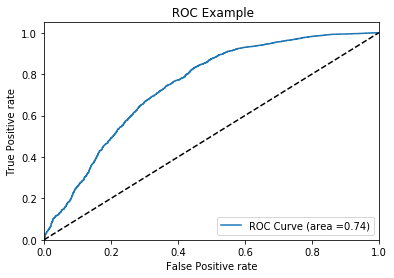

In [106]:
from sklearn.metrics import roc_curve, auc

fpr= dict()
tpr= dict()
roc_auc= dict()
y_test = [i[1] for i in results_list]
y_score= [i[0] for i in results_list]
fpr, tpr, _ = roc_curve(y_test,y_score)
roc_auc = auc(fpr, tpr)
%matplotlib inline
plt.figure()
plt.plot(fpr,tpr, label = 'ROC Curve (area =%0.2f)' % roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title(' ROC Example')
plt.legend(loc='lower right')
plt.show()

# CONCLUSION

### ROC Score of 0.74 is good. Increasing the number of trees value in RandomForest can help achieve a better score. Also, more cleaning techniques can be applied in order to refine the input data.Sampling ratio can be reduced to take even matching samples.

## WE HOPE YOU ENJOYED GOING THROUGH THIS NOTEBOOK. GOOD LUCK!!!